In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dataset = pd.read_csv("imu_data_without_gravity.csv")
dataset.head()

,Timestamp,linear_accelerationX,linear_accelerationY,linear_accelerationZ,magX,magY,magZ,gyroX,gyroY,gyroZ
0,1.742913e+09,-0.000655,-0.000692,0.002059,-150.695801,-84.948730,399.987793,0.915527,4.943848,0.244141
1,1.742913e+09,0.000316,0.000520,0.002025,-150.781250,-84.472656,399.987793,0.732422,4.882812,0.244141
2,1.742913e+09,-0.000649,-0.000089,0.000671,-150.744629,-85.461426,399.987793,0.793457,4.882812,0.244141
3,1.742913e+09,-0.000518,-0.000688,0.000300,-149.780273,-84.533691,399.987793,0.854492,4.821777,0.183105
4,1.742913e+09,0.000330,-0.001757,-0.000666,-149.902344,-84.606934,399.987793,0.854492,5.004883,0.244141


In [53]:
dataset["delta_time"] = [0] + [dataset["Timestamp"][i + 1] - dataset["Timestamp"][i] for i in range(len(dataset["Timestamp"][:-1]))]
dataset["abs_time"] = [dataset["delta_time"][:i].sum() for i in range(1, len(dataset["delta_time"]) + 1)]
dataset.head(10)

,Timestamp,linear_accelerationX,linear_accelerationY,linear_accelerationZ,magX,magY,magZ,gyroX,gyroY,gyroZ,delta_time,abs_time
0,1.742913e+09,-0.000655,-0.000692,0.002059,-150.695801,-84.948730,399.987793,0.915527,4.943848,0.244141,0.000000,0.000000
1,1.742913e+09,0.000316,0.000520,0.002025,-150.781250,-84.472656,399.987793,0.732422,4.882812,0.244141,0.044715,0.044715
2,1.742913e+09,-0.000649,-0.000089,0.000671,-150.744629,-85.461426,399.987793,0.793457,4.882812,0.244141,0.045041,0.089756
3,1.742913e+09,-0.000518,-0.000688,0.000300,-149.780273,-84.533691,399.987793,0.854492,4.821777,0.183105,0.044898,0.134654
4,1.742913e+09,0.000330,-0.001757,-0.000666,-149.902344,-84.606934,399.987793,0.854492,5.004883,0.244141,0.046547,0.181201
5,1.742913e+09,-0.000635,-0.000407,0.001747,-149.426270,-83.618164,399.987793,0.854492,4.821777,0.305176,0.089564,0.270765
6,1.742913e+09,-0.000265,-0.000520,0.002558,-149.951172,-83.898926,399.987793,0.915527,5.065918,0.183105,0.043938,0.314703
7,1.742913e+09,-0.000140,0.000689,-0.000966,-149.645996,-83.825684,399.987793,0.915527,4.760742,0.305176,0.044902,0.359605
8,1.742913e+09,-0.000858,-0.000163,0.000731,-150.073242,-84.301758,399.987793,0.976562,4.821777,0.122070,0.044984,0.404589
9,1.742913e+09,-0.000724,-0.000881,0.002280,-149.487305,-84.045410,399.987793,1.037598,4.821777,0.244141,0.044927,0.449516


In [54]:
gyroX_dev = dataset["gyroX"][0]
dataset["gyroX0"] = dataset["gyroX"] - gyroX_dev
gyroY_dev = dataset["gyroY"][0]
dataset["gyroY0"] = dataset["gyroY"] - gyroY_dev
gyroZ_dev = dataset["gyroZ"][0]
dataset["gyroZ0"] = dataset["gyroZ"] - gyroZ_dev

dataset.head()

,Timestamp,linear_accelerationX,linear_accelerationY,linear_accelerationZ,magX,magY,magZ,gyroX,gyroY,gyroZ,delta_time,abs_time,gyroX0,gyroY0,gyroZ0
0,1.742913e+09,-0.000655,-0.000692,0.002059,-150.695801,-84.948730,399.987793,0.915527,4.943848,0.244141,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.742913e+09,0.000316,0.000520,0.002025,-150.781250,-84.472656,399.987793,0.732422,4.882812,0.244141,0.044715,0.044715,-0.183105,-0.061035,0.000000
2,1.742913e+09,-0.000649,-0.000089,0.000671,-150.744629,-85.461426,399.987793,0.793457,4.882812,0.244141,0.045041,0.089756,-0.122070,-0.061035,0.000000
3,1.742913e+09,-0.000518,-0.000688,0.000300,-149.780273,-84.533691,399.987793,0.854492,4.821777,0.183105,0.044898,0.134654,-0.061035,-0.122070,-0.061035
4,1.742913e+09,0.000330,-0.001757,-0.000666,-149.902344,-84.606934,399.987793,0.854492,5.004883,0.244141,0.046547,0.181201,-0.061035,0.061035,0.000000


In [55]:
g_to_mps2 = 9.81
dataset['accX_mps2'] = dataset['linear_accelerationX'] * g_to_mps2
dataset['accY_mps2'] = dataset['linear_accelerationY'] * g_to_mps2
dataset['accZ_mps2'] = dataset['linear_accelerationZ'] * g_to_mps2

dataset.head()

,Timestamp,linear_accelerationX,linear_accelerationY,linear_accelerationZ,magX,magY,magZ,gyroX,gyroY,gyroZ,delta_time,abs_time,gyroX0,gyroY0,gyroZ0,accX_mps2,accY_mps2,accZ_mps2
0,1.742913e+09,-0.000655,-0.000692,0.002059,-150.695801,-84.948730,399.987793,0.915527,4.943848,0.244141,0.000000,0.000000,0.000000,0.000000,0.000000,-0.006424,-0.006787,0.020200
1,1.742913e+09,0.000316,0.000520,0.002025,-150.781250,-84.472656,399.987793,0.732422,4.882812,0.244141,0.044715,0.044715,-0.183105,-0.061035,0.000000,0.003104,0.005103,0.019866
2,1.742913e+09,-0.000649,-0.000089,0.000671,-150.744629,-85.461426,399.987793,0.793457,4.882812,0.244141,0.045041,0.089756,-0.122070,-0.061035,0.000000,-0.006369,-0.000870,0.006583
3,1.742913e+09,-0.000518,-0.000688,0.000300,-149.780273,-84.533691,399.987793,0.854492,4.821777,0.183105,0.044898,0.134654,-0.061035,-0.122070,-0.061035,-0.005086,-0.006744,0.002941
4,1.742913e+09,0.000330,-0.001757,-0.000666,-149.902344,-84.606934,399.987793,0.854492,5.004883,0.244141,0.046547,0.181201,-0.061035,0.061035,0.000000,0.003242,-0.017232,-0.006529


In [56]:
import numpy as np

deg_to_rad = np.pi / 180
dataset['gyroX_rad'] = dataset['gyroX0'] * deg_to_rad
dataset['gyroY_rad'] = dataset['gyroY0'] * deg_to_rad
dataset['gyroZ_rad'] = dataset['gyroZ0'] * deg_to_rad

dataset.head()

,Timestamp,linear_accelerationX,linear_accelerationY,linear_accelerationZ,magX,magY,magZ,gyroX,gyroY,gyroZ,...,abs_time,gyroX0,gyroY0,gyroZ0,accX_mps2,accY_mps2,accZ_mps2,gyroX_rad,gyroY_rad,gyroZ_rad
0,1.742913e+09,-0.000655,-0.000692,0.002059,-150.695801,-84.948730,399.987793,0.915527,4.943848,0.244141,...,0.000000,0.000000,0.000000,0.000000,-0.006424,-0.006787,0.020200,0.000000,0.000000,0.000000
1,1.742913e+09,0.000316,0.000520,0.002025,-150.781250,-84.472656,399.987793,0.732422,4.882812,0.244141,...,0.044715,-0.183105,-0.061035,0.000000,0.003104,0.005103,0.019866,-0.003196,-0.001065,0.000000
2,1.742913e+09,-0.000649,-0.000089,0.000671,-150.744629,-85.461426,399.987793,0.793457,4.882812,0.244141,...,0.089756,-0.122070,-0.061035,0.000000,-0.006369,-0.000870,0.006583,-0.002131,-0.001065,0.000000
3,1.742913e+09,-0.000518,-0.000688,0.000300,-149.780273,-84.533691,399.987793,0.854492,4.821777,0.183105,...,0.134654,-0.061035,-0.122070,-0.061035,-0.005086,-0.006744,0.002941,-0.001065,-0.002131,-0.001065
4,1.742913e+09,0.000330,-0.001757,-0.000666,-149.902344,-84.606934,399.987793,0.854492,5.004883,0.244141,...,0.181201,-0.061035,0.061035,0.000000,0.003242,-0.017232,-0.006529,-0.001065,0.001065,0.000000


In [57]:
from scipy.spatial.transform import Rotation as R

roll, pitch, yaw = 0, 0, 0  # Assume initial orientation is (0,0,0)
# Arrays to store computed values
acc_global = np.zeros((len(dataset), 3))  # Global acceleration
vel_global = np.zeros((len(dataset), 3))  # Global velocity
pos_global = np.zeros((len(dataset), 3))  # Global position

for i in range(1, len(dataset)):
    dt = dataset['delta_time'].iloc[i]
    
    # Update rotation angles using gyroscope data (simple integration)
    roll += dataset['gyroX_rad'].iloc[i] * dt
    pitch += dataset['gyroY_rad'].iloc[i] * dt
    yaw += dataset['gyroZ_rad'].iloc[i] * dt

    # Compute rotation matrix from local frame to global frame
    rotation_matrix = R.from_euler('xyz', [roll, pitch, yaw]).as_matrix()

    # Transform local acceleration to global frame
    acc_local = np.array([
        dataset['accX_mps2'].iloc[i],
        dataset['accY_mps2'].iloc[i],
        dataset['accZ_mps2'].iloc[i]
    ])
    acc_global[i] = rotation_matrix @ acc_local  # Rotate acceleration to global frame

    # Integrate acceleration to get velocity
    vel_global[i] = vel_global[i-1] + acc_global[i] * dt

    # Integrate velocity to get position
    pos_global[i] = pos_global[i-1] + vel_global[i] * dt

# Add velocity and position data to dataset
dataset['velocityX'] = vel_global[:, 0]
dataset['velocityY'] = vel_global[:, 1]
dataset['velocityZ'] = vel_global[:, 2]
dataset['posX'] = pos_global[:, 0]
dataset['posY'] = pos_global[:, 1]
dataset['posZ'] = pos_global[:, 2]

# Display first few rows of dataset with new velocity and position columns
dataset.head(10)

,Timestamp,linear_accelerationX,linear_accelerationY,linear_accelerationZ,magX,magY,magZ,gyroX,gyroY,gyroZ,...,accZ_mps2,gyroX_rad,gyroY_rad,gyroZ_rad,velocityX,velocityY,velocityZ,posX,posY,posZ
0,1.742913e+09,-0.000655,-0.000692,0.002059,-150.695801,-84.948730,399.987793,0.915527,4.943848,0.244141,...,0.020200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
1,1.742913e+09,0.000316,0.000520,0.002025,-150.781250,-84.472656,399.987793,0.732422,4.882812,0.244141,...,0.019866,-0.003196,-0.001065,0.000000,0.000139,0.000228,0.000888,6.203519e-06,0.000010,0.000040
2,1.742913e+09,-0.000649,-0.000089,0.000671,-150.744629,-85.461426,399.987793,0.793457,4.882812,0.244141,...,0.006583,-0.002131,-0.001065,0.000000,-0.000148,0.000189,0.001185,-4.706452e-07,0.000019,0.000093
3,1.742913e+09,-0.000518,-0.000688,0.000300,-149.780273,-84.533691,399.987793,0.854492,4.821777,0.183105,...,0.002941,-0.001065,-0.002131,-0.001065,-0.000377,-0.000114,0.001317,-1.737875e-05,0.000014,0.000152
4,1.742913e+09,0.000330,-0.001757,-0.000666,-149.902344,-84.606934,399.987793,0.854492,5.004883,0.244141,...,-0.006529,-0.001065,0.001065,0.000000,-0.000226,-0.000916,0.001013,-2.788438e-05,-0.000029,0.000199
5,1.742913e+09,-0.000635,-0.000407,0.001747,-149.426270,-83.618164,399.987793,0.854492,4.821777,0.305176,...,0.017134,-0.001065,-0.002131,0.001065,-0.000785,-0.001273,0.002548,-9.814723e-05,-0.000143,0.000428
6,1.742913e+09,-0.000265,-0.000520,0.002558,-149.951172,-83.898926,399.987793,0.915527,5.065918,0.183105,...,0.025094,0.000000,0.002131,-0.001065,-0.000899,-0.001497,0.003650,-1.376430e-04,-0.000209,0.000588
7,1.742913e+09,-0.000140,0.000689,-0.000966,-149.645996,-83.825684,399.987793,0.915527,4.760742,0.305176,...,-0.009474,0.000000,-0.003196,0.001065,-0.000961,-0.001193,0.003225,-1.807742e-04,-0.000262,0.000733
8,1.742913e+09,-0.000858,-0.000163,0.000731,-150.073242,-84.301758,399.987793,0.976562,4.821777,0.122070,...,0.007170,0.001065,-0.002131,-0.002131,-0.001340,-0.001265,0.003547,-2.410309e-04,-0.000319,0.000892
9,1.742913e+09,-0.000724,-0.000881,0.002280,-149.487305,-84.045410,399.987793,1.037598,4.821777,0.244141,...,0.022362,0.002131,-0.002131,0.000000,-0.001659,-0.001653,0.004552,-3.155765e-04,-0.000394,0.001097


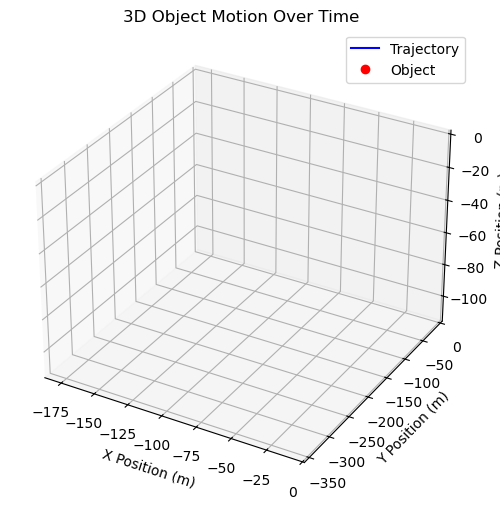

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

# Extract data
x, y, z = dataset['posX'].values, dataset['posY'].values, dataset['posZ'].values
time_steps = dataset['abs_time'].values

# Set up the figure and 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Set axis limits (adjust dynamically if needed)
ax.set_xlim(min(x) - 1, max(x) + 1)
ax.set_ylim(min(y) - 1, max(y) + 1)
ax.set_zlim(min(z) - 1, max(z) + 1)

# Labels
ax.set_xlabel('X Position (m)')
ax.set_ylabel('Y Position (m)')
ax.set_zlabel('Z Position (m)')
ax.set_title('3D Object Motion Over Time')

# Initialize the trajectory line and moving point
trajectory, = ax.plot([], [], [], 'b', label="Trajectory")  # Full trajectory
point, = ax.plot([], [], [], 'ro', markersize=6, label="Object")  # Moving object

# Update function for animation
def update(frame):
    trajectory.set_data(x[:frame], y[:frame])  # Update trajectory
    trajectory.set_3d_properties(z[:frame])
    
    point.set_data(x[frame], y[frame])  # Update moving object position
    point.set_3d_properties(z[frame])

    return trajectory, point

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(x), interval=30, blit=False)

# Show animation
plt.legend()
plt.show()
